# Diabetes Prediction by using Machine Learning:

Number of Observation Units: 

Variable Number:

## DataSet Details: 
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Skin fold thickness (mm)
- Insulin: 2 hr serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

# Eploratory Data

In [5]:
#Installations Needed:

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import numpy as np
import statsmodels.api as sm
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold


import warnings
warnings.simplefilter(action = "ignore") 

In [6]:
#Import Dataset:
dfile = pd.read_csv("UpdatedDiabetes.csv")

dfile.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [7]:
#Display the dataset size:
dfile.shape

(768, 9)

In [8]:
#Display feature information:
dfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#Display descriptive statistics of the data set:
dfile.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [10]:
#Display the "distribution" of the outcome variable:
dfile["Outcome"].value_counts()*100/len(dfile)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [11]:
#Display the "classes" of the outcome variable:
dfile.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Max Age is: 81, Min Age is: 21


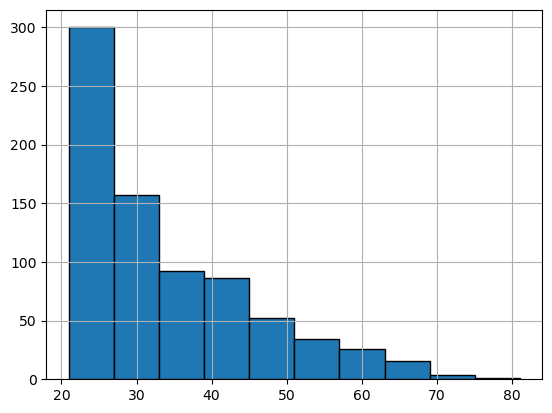

In [12]:
#Display a histagram of the "Age" variable:
dfile["Age"].hist(edgecolor = "black");

print("Max Age is: " + str(dfile["Age"].max()) + ", Min Age is: " + str(dfile["Age"].min()))

Max BMI is: 67.1, Min BMI is: 0.0


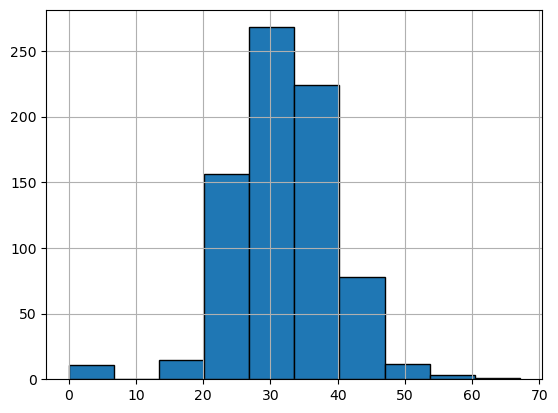

In [13]:
#Display a histagram of the "BMI" variable:
dfile["BMI"].hist(edgecolor = "black");

print("Max BMI is: " + str(dfile["BMI"].max()) + ", Min BMI is: " + str(dfile["BMI"].min()))

<Axes: xlabel='BMI', ylabel='Density'>

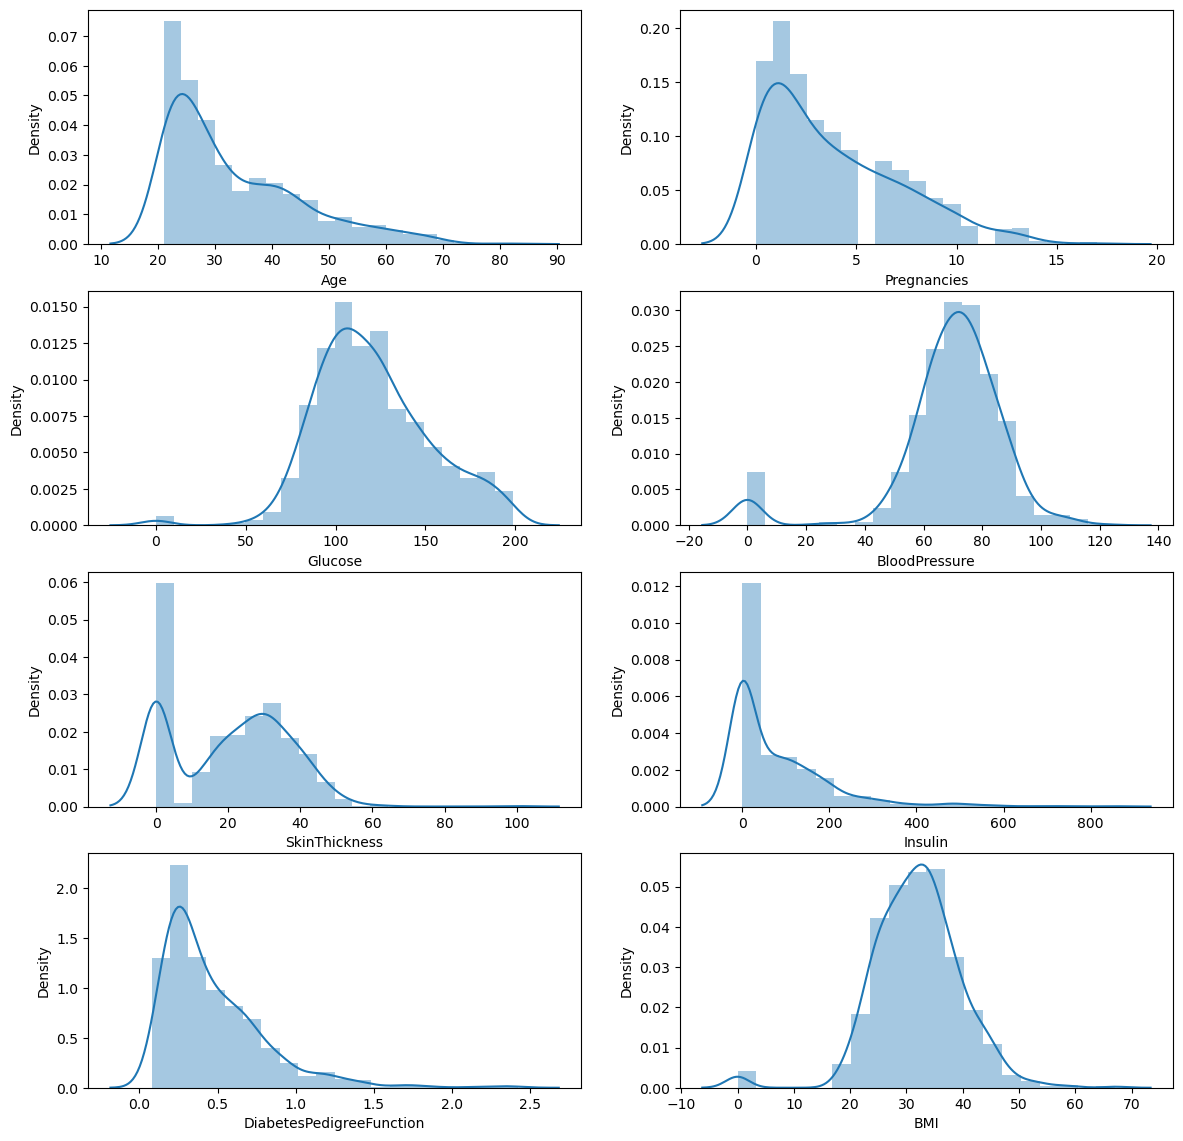

In [14]:
#Histogram and density graphs of all variables were accessed:
fig, ax = plt.subplots(4,2, figsize=(14,14))
sns.distplot(dfile.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(dfile.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(dfile.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(dfile.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(dfile.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(dfile.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(dfile.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(dfile.BMI, bins = 20, ax=ax[3,1]) 

In [15]:
#Group by "Age" and "mean":
dfile.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [16]:
#Group by "Age" and "max":
dfile.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [17]:
#Group by "Insulin" and "mean":
dfile.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [18]:
#Group by "Insulin" and "max":  
dfile.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


In [19]:
#Group by "Pregnancies" and "mean":
dfile.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [20]:
#Group by "Glucose" and "mean":
dfile.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [21]:
#Group by "Glucose" and "max":
dfile.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [22]:
#Group by "BMI" and "mean":
dfile.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


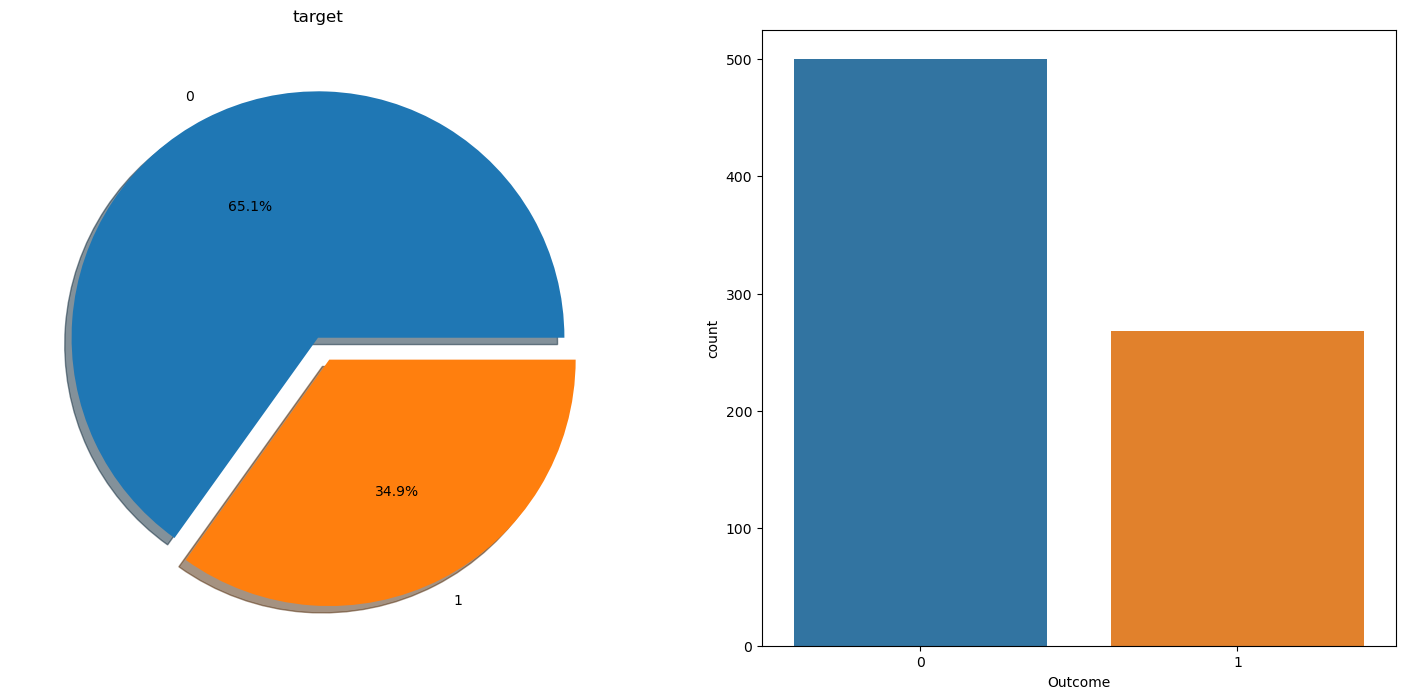

In [23]:
#Show the distribution of the outcome variable in the data:
f,ax=plt.subplots(1,2,figsize=(18,8))
dfile['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(data=dfile, x='Outcome')
plt.show()

In [24]:
# Access to the correlation of the data set was provided. What kind of relationship is examined between the variables. 
# If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 is no correlation.
# If the correlation equates to <0, there is a negative correlation. While one variable increases, the other variable decreases. 
# When the correlations are examined, there are 2 variables that act as a positive correlation to the Salary dependent variable.
# Example variable is: Glucose. As these increase, Outcome variable increases.
dfile.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


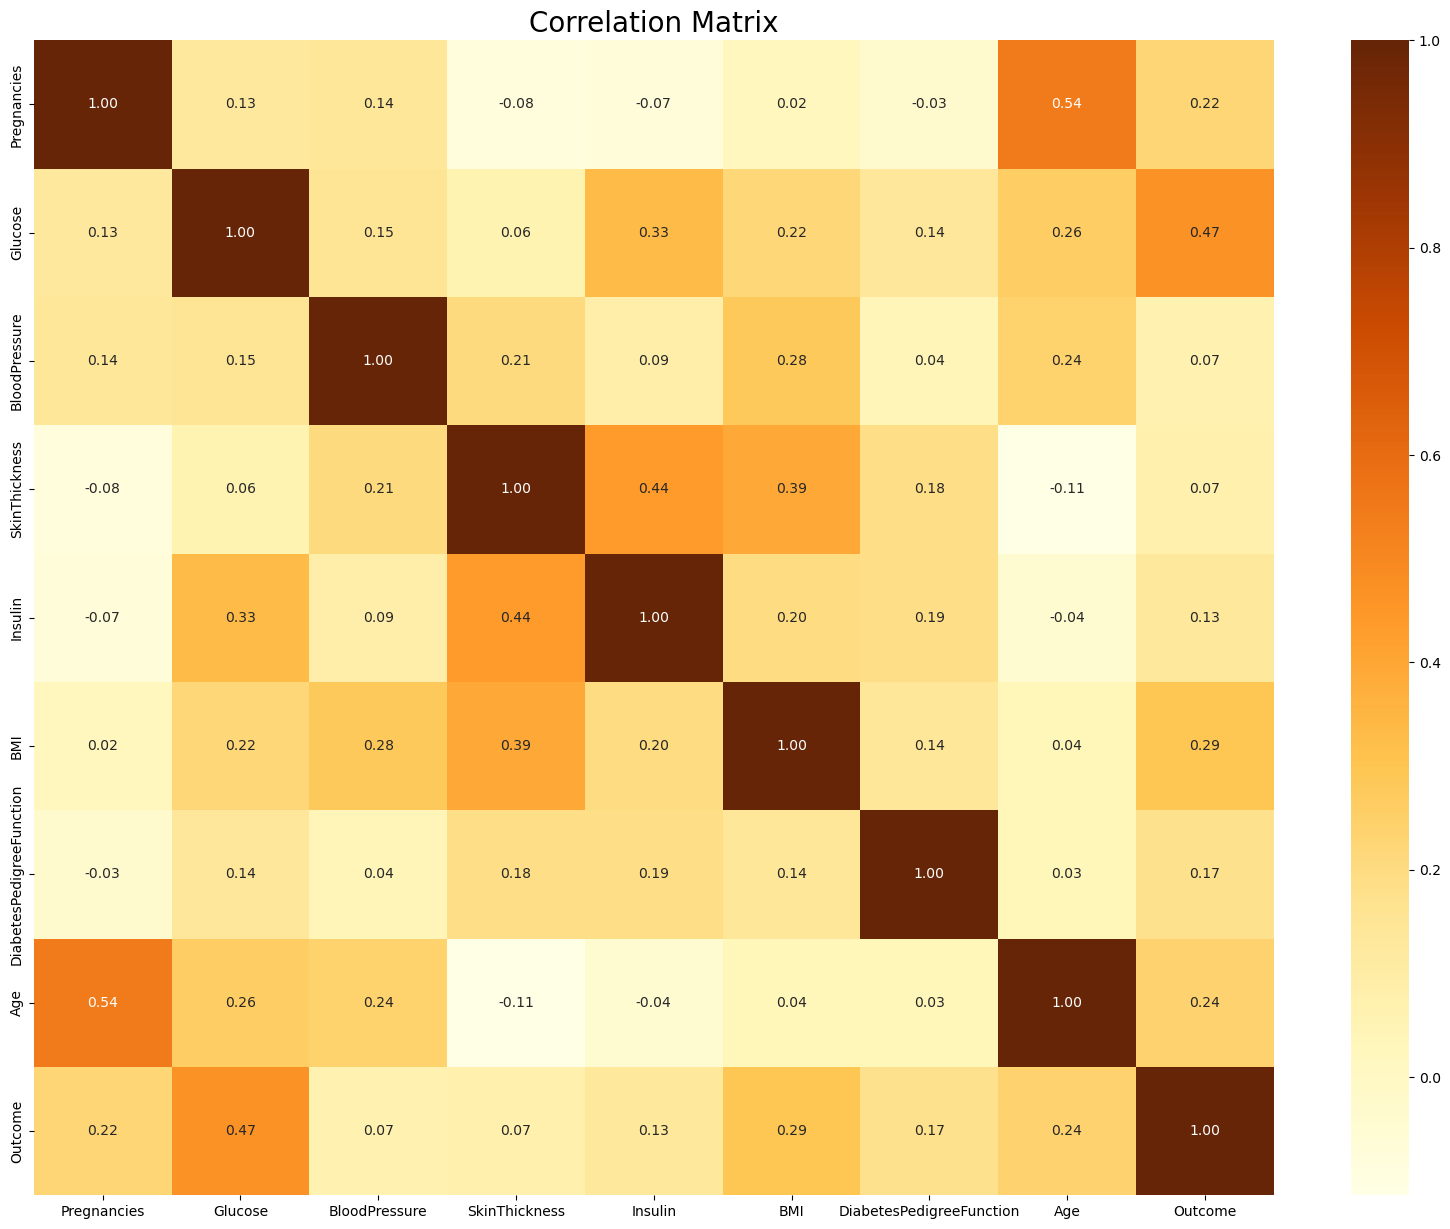

In [25]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(dfile.corr(), annot=True, fmt=".2f", ax=ax, cmap = "YlOrBr" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [26]:
#Renaming the Columns:
dfile[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dfile[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

dfile.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
1,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
2,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0


In [27]:
#Show Null/NaN values: PRE
dfile.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

##Remove Null/NaN Values:

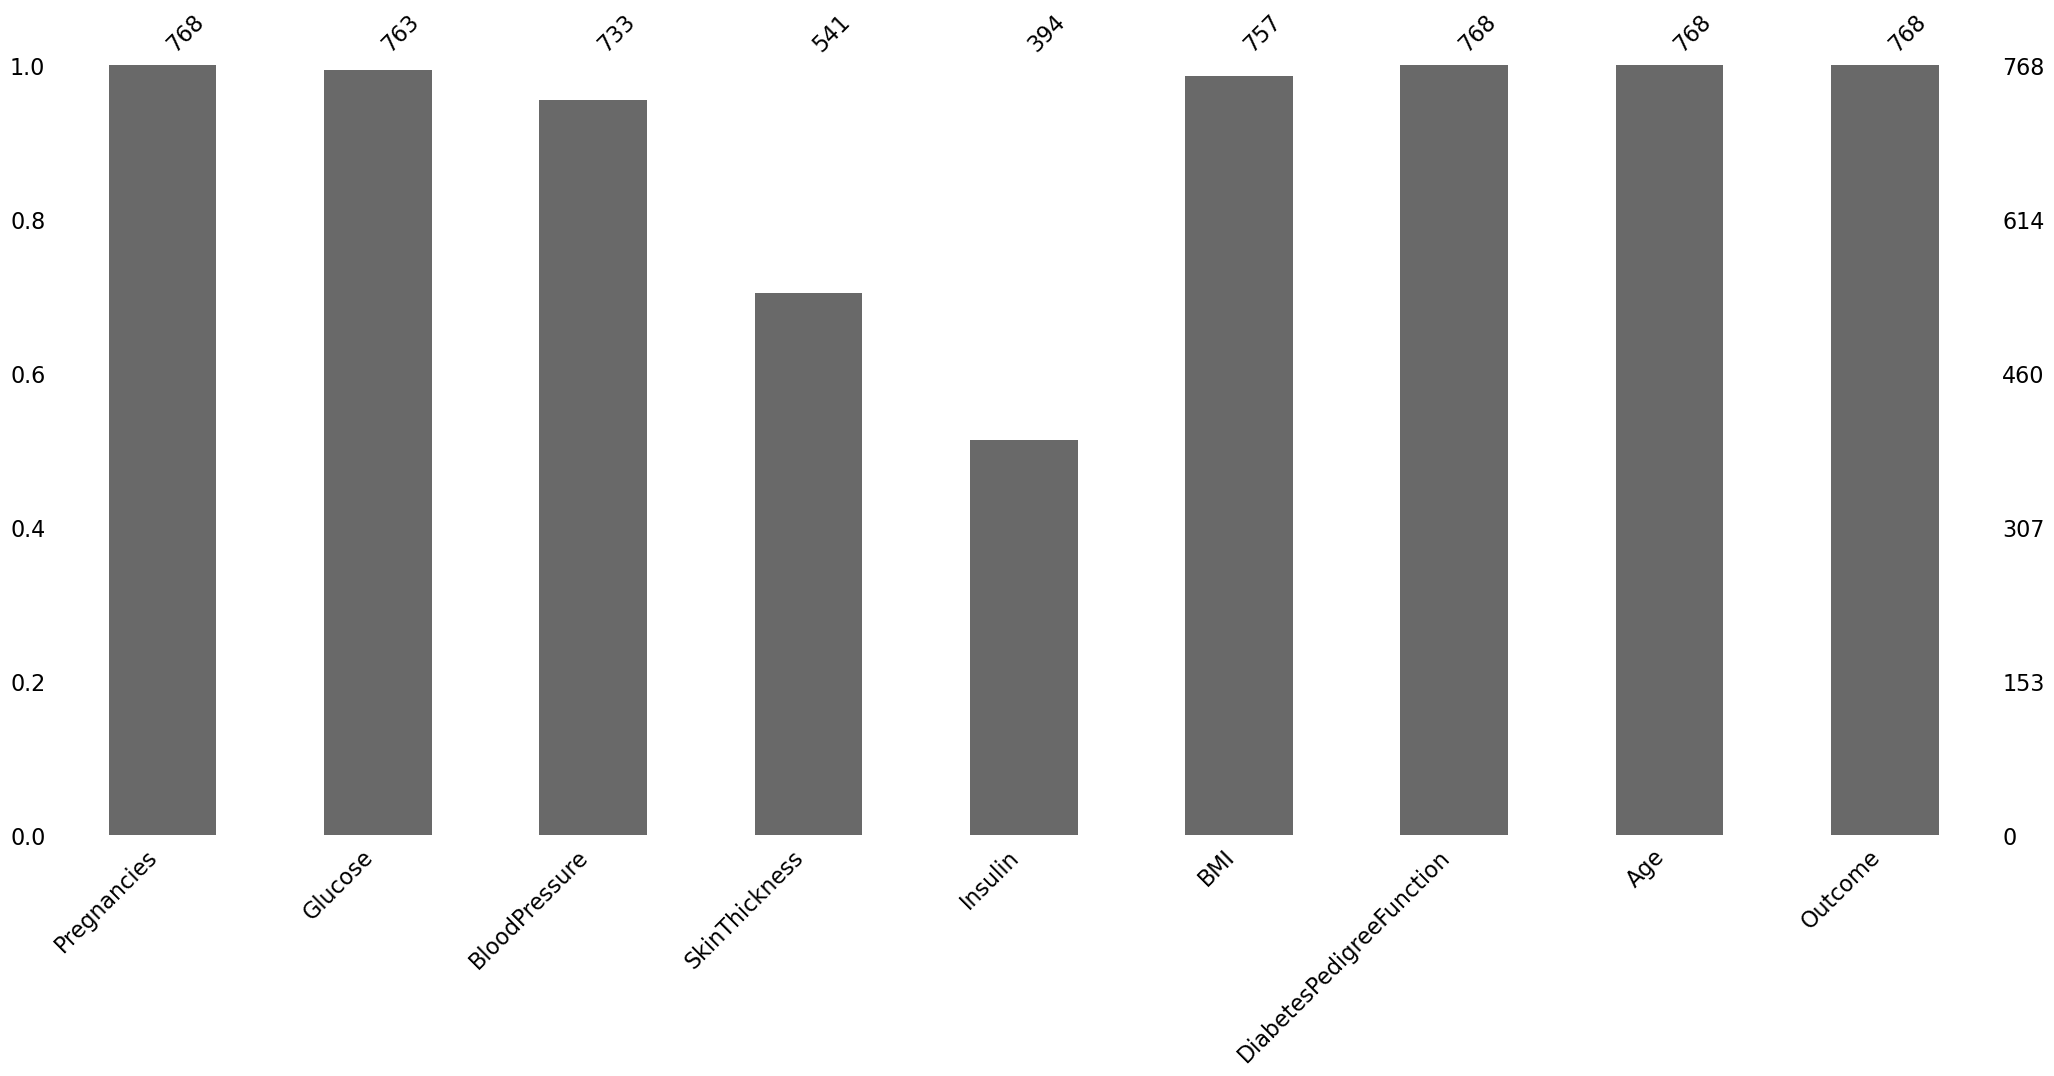

In [28]:
#Use Missingno to drop Null/NaN values:
import missingno as msno
msno.bar(dfile);

In [29]:
#Incorporate the 'Missing' values: *use the median values ​​of each variable.:
def median_target(var):   
    temp = dfile[dfile[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [30]:
#Incorporate the 'Incomplete' observations values with the given median target value:
columns = dfile.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    dfile.loc[(dfile['Outcome'] == 0 ) & (dfile[i].isnull()), i] = median_target(i)[i][0]
    dfile.loc[(dfile['Outcome'] == 1 ) & (dfile[i].isnull()), i] = median_target(i)[i][1]

In [31]:
#Show new dataframe:
dfile.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
1,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
2,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0


In [32]:
#Show Null/NaN values: POST
dfile.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Outlier Observation:

In [33]:
#In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
#Yes to 
for feature in dfile:
    
    Q1 = dfile[feature].quantile(0.25)
    Q3 = dfile[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if dfile[(dfile[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


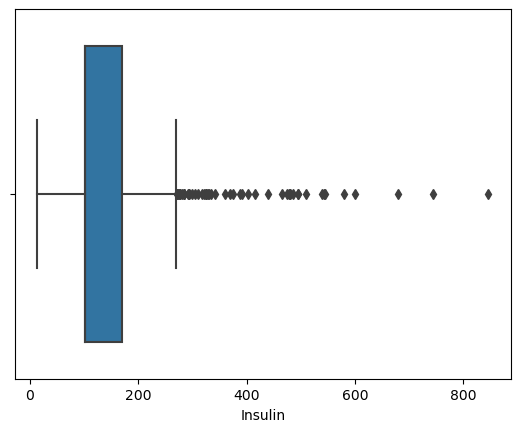

In [34]:
# The process of visualizing the Insulin variable with boxplot method was done. We find the outlier observations on the chart.
import seaborn as sns
sns.boxplot(x = dfile["Insulin"]);

##Locating Outliers:

In [35]:
#We conduct a stand alone observation review for the Insulin variable
#We suppress contradictory values
Q1 = dfile.Insulin.quantile(0.25)
Q3 = dfile.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
dfile.loc[dfile["Insulin"] > upper,"Insulin"] = upper

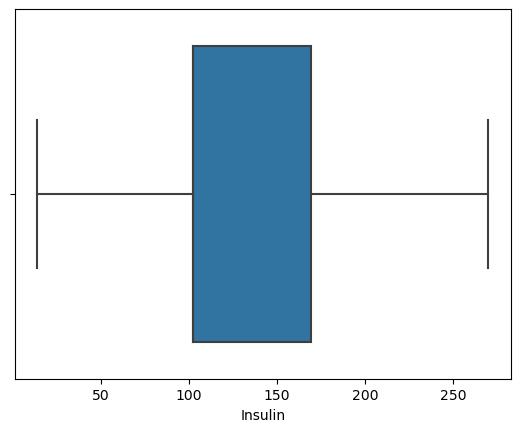

In [36]:
import seaborn as sns
sns.boxplot(x = dfile["Insulin"]);

In [37]:
#Use LOF Method to determine outliers:
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(dfile)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1

In [38]:
#Display Outlier Values:
dfile_scores = lof.negative_outlier_factor_
np.sort(dfile_scores)[0:40]

array([-3.05893469, -2.37289269, -2.15297995, -2.09708735, -2.0772561 ,
       -1.95255968, -1.86384019, -1.74003158, -1.72703492, -1.71674689,
       -1.70343883, -1.6688722 , -1.64296768, -1.64190437, -1.61620872,
       -1.61369917, -1.60057603, -1.5988774 , -1.59608032, -1.57027568,
       -1.55876022, -1.55674614, -1.51852389, -1.50843907, -1.50280943,
       -1.50160698, -1.48391514, -1.4752983 , -1.4713427 , -1.47006248,
       -1.46976606, -1.46794707, -1.46721527, -1.46301346, -1.45360062,
       -1.45302122, -1.44375649, -1.44010321, -1.4399884 , -1.43991104])

In [39]:
#We choose the threshold value according to lof scores
threshold = np.sort(dfile_scores)[7]
threshold

-1.740031580305444

In [40]:
#We delete those that are higher than the threshold
outlier = dfile_scores > threshold
df = dfile[outlier]

In [41]:
# The size of the data set was examined:
dfile.shape

(768, 9)

# Features

In [42]:
#Create categorical variables for "BMICategory":
BMICategory = pd.Series(["Underweight", "Normal Range", "Overweight", "Obese- I", "Obese- Class II", "Obese- Class III"], dtype = "category")
dfile.loc[dfile["BMI"] < 18.49, "BMICategory"] = BMICategory[0]
dfile.loc[(dfile["BMI"] > 18.5) & (dfile["BMI"] <= 24.9), "BMICategory"] = BMICategory[1]
dfile.loc[(dfile["BMI"] > 25.0) & (dfile["BMI"] <= 29.9), "BMICategory"] = BMICategory[2]
dfile.loc[(dfile["BMI"] > 30.0) & (dfile["BMI"] <= 34.9), "BMICategory"] = BMICategory[3]
dfile.loc[(dfile["BMI"] > 35.0) & (dfile["BMI"] <= 39.9), "BMICategory"] = BMICategory[4]
dfile.loc[dfile["BMI"] > 40.0 ,"BMICategory"] = BMICategory[5]

dfile.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMICategory
0,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
1,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal Range
2,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obese- Class III
4,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0,Overweight


In [43]:
#Create a categorical variable creation process is performed according to the insulin value.:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [44]:
#The operation performed was added to the dataframe.
dfile = dfile.assign(InsulinRange=dfile.apply(set_insulin, axis=1))

dfile.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMICategory,InsulinRange
0,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
1,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal Range,Abnormal
2,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obese- Class III,Abnormal
4,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0,Overweight,Normal
